In [1]:

import scanpy as sc
#import session_info
import os
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#import seaborn as sns
import math
#from plotnine import *
#import scvi
import os
#import celltypist
#import scanpy
# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=50, facecolor="white", frameon=False, figsize=(5,5))
%matplotlib inline
sc.settings.verbosity = 0




In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#%matplotlib inline
sc.settings.figdir = "."
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(8,8))


In [3]:
FILE_NAME = "adata_combined_new.h5ad.final.filtered.scrna"

PATH2=f'/nfs/team298/ls34/adult_skin/final_adatas/{FILE_NAME}'
adata=sc.read_h5ad(PATH2)
# adata_5k=adata[adata.obs["tech"]=="xenium"]
# adata_5k=adata[adata.obs["tech"]!="xenium"]

# adata_5k.obs["Timepoint2"].value_counts()
#adata_5k=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_xenium_v1.h5ad.final')
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata_5k.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata_5k.var_names]
    return LIST


# adata_5k.obs["lvl4_annotation"]=adata_5k.obs["scanvi_predictions"]
# adata_5k.obs["lvl5_annotation_new"]=adata_5k.obs["lvl4_annotation"]




In [4]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [6]:
adata.obs["atlas_status_simple"].value_counts()

atlas_status_simple
Eczema_Lesional                                   190291
Psoriasis_Lesional                                145006
Psoriasis_PostRx                                   96485
Eczema_Nonlesional                                 92297
Eczema_PostRx                                      10920
Healthy_Nonlesional_prurigo_calugura_GSE213849      2490
Eczema_Lesional_prurigo_calugura_GSE213849          1400
Name: count, dtype: int64

/software/isg/languages/Python/Python-3.11.10-jupyter/exec/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


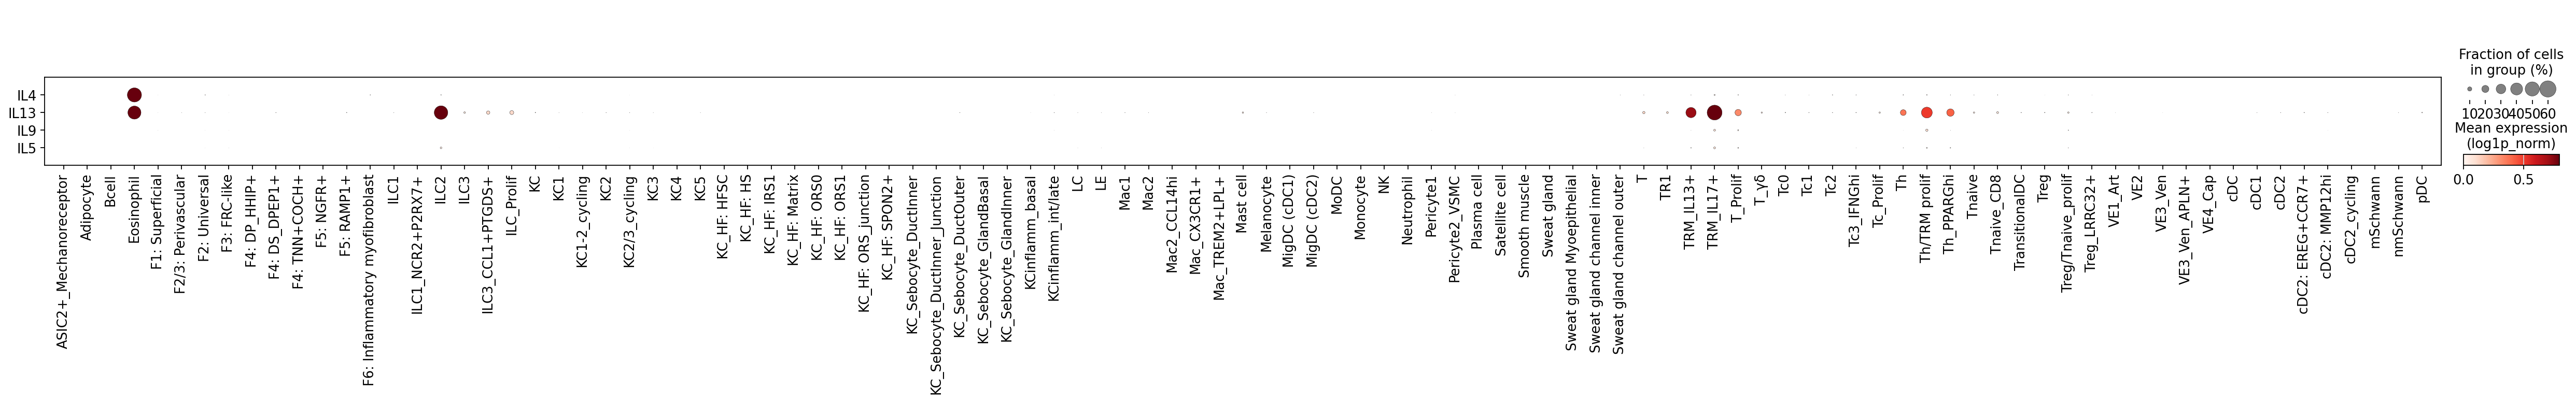

In [7]:
sc.pl.dotplot(adata[adata.obs["atlas_status_simple"]=="Eczema_Lesional"], 
              [ "IL4", "IL13", "IL9", "IL5"],
              groupby="lvl5_annotation",
              dendrogram=False, 
                #standard_scale="var",
              vmax=0.8,
              colorbar_title="Mean expression\n(log1p_norm)",
              swap_axes=True,
              save="supp7c_type2cytokines.pdf"
          #   categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]
             )

# original

In [10]:
#FILE_NAME = "adata_scrna_v3.h5ad.final"
FILE_NAME = "adata_scrna_freeze.h5ad"
PATH2=f'/nfs/team298/ls34/adult_skin/final_adatas/{FILE_NAME}'
# adata.write(f'/nfs/team298/ls34/adult_skin/final_adatas/{FILE_NAME}')
adata=sc.read_h5ad(PATH2)
# try:
#     adata=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_scrna_v1.h5ad.final')
# except:
#     import scanpy as sc
#     adata=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_scrna_v1.h5ad.final')

adata.obs["lvl5_annotation_new"]=adata.obs["lvl4_annotation"]

# #adata=adata[adata.obs["tech"]!="xenium"]
# adata


 

In [11]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [3]:
# adata=adata[adata.obs["lvl0"].str.startswith("F")].copy()
# import gc
# gc.collect()


1595

/software/isg/languages/Python/Python-3.11.10-jupyter/exec/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


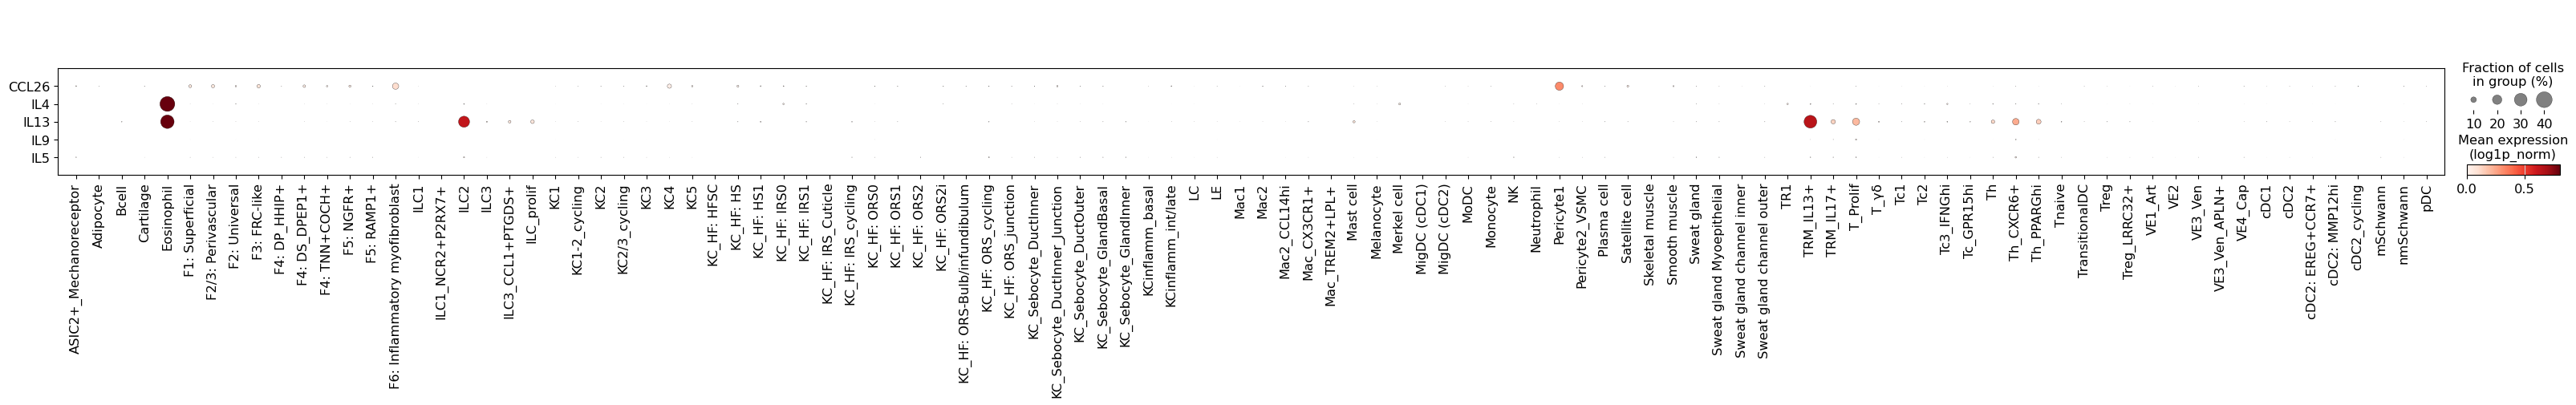

In [13]:
sc.pl.dotplot(adata, 
              [ "IL4", "IL13", "IL9", "IL5"],
              groupby="lvl5_annotation",
              dendrogram=False, 
                #standard_scale="var",
              vmax=0.8,
              colorbar_title="Mean expression\n(log1p_norm)",
              swap_axes=True,
              save="supp7c_type2cytokines.pdf"
          #   categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]
             )

In [4]:
adata_5k=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_xenium_freeze.h5ad')
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata_5k.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata_5k.var_names]
    return LIST



adata_5k.obs["lvl5_annotation_new"]=adata_5k.obs["lvl4_annotation"]
adata_5k=adata_5k[adata_5k.obs["lvl0"].str.startswith("F")].copy()

adata_5k



AnnData object with n_obs × n_vars = 156012 × 5000
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'sample_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'xenium_id', 'xenium_id_recoded', 'Site_status', 'GSTT patient ID', 'Sanger patient ID', 'Drug', 'Responder', 'Timepoint', "Library type (CITE or 5'GEX/TCR)", 'Segmentation Y/N?', 'Sample ID', 'Xenium slide number', 'Xenium region number2', 'baseline_postrx', 'info_id', 'Annotation', 'NICHE_NAMES', 'batch', 'DonorID', 'leiden_res1', 'leiden_res2', 'new_annotation', 'new_annotation2', 'new_annotation3', 'annotation_new4', 'new_annotation4'

In [5]:
sc.pp.normalize_total(adata_5k, target_sum=1e4)
sc.pp.log1p(adata_5k)

In [7]:
0

0

/software/isg/languages/Python/Python-3.11.10-jupyter/exec/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


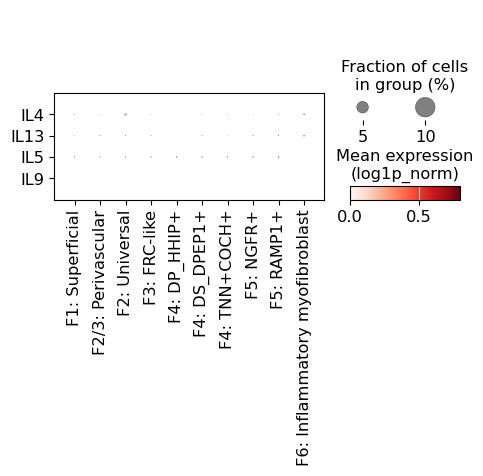

In [8]:
# sc.pl.dotplot(adata, 
#               ["IL4", "IL13", "IL5", "IL9"],
#               groupby="lvl5_annotation",
#               dendrogram=False, 
#                 #standard_scale="var",
#               vmax=0.8,
#               colorbar_title="Mean expression\n(log1p_norm)",
#               swap_axes=True
#           #   categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]
#              )

In [9]:
# adata_i.obs["lvl5_annotation"].unique()

NameError: name 'adata_i' is not defined

In [ ]:
adata_i=adata[adata.obs["lvl4_annotation"].str.startswith("F")]
ORDER = [ 'F1: Superficial', 'F2: Universal', 'F2/3: Perivascular','F3: FRC-like',  'F4: DS_DPEP1+', 'F4: TNN+COCH+',  'F4: DP_HHIP+', 
         'F5: RAMP1+', 'F5: NGFR+', 
         'F6: Inflammatory myofibroblast']
sc.pl.dotplot(adata_i, 
              ["IL4R", "IL13RA1","IL13RA2", "OSMR", "LIFR"],
              groupby="lvl5_annotation",
              dendrogram=False, 
                #standard_scale="var",
              vmax=.8,
              colorbar_title="Mean expression\n(log1p_norm)",
              categories_order=ORDER
              #swap_axes=True
          #   categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]
             )
sc.pl.dotplot(adata_i, 
              ["IL4R", "IL13RA1","IL13RA2", "OSMR", "LIFR"],
              groupby="lvl5_annotation",
              dendrogram=False, 
                standard_scale="var",
              #vmax=.8,
              colorbar_title="Mean expression\n(variance scaled)",
              categories_order=ORDER
              #swap_axes=True
          #   categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]
             )

In [ ]:
for x in ["Eczema", "Psoriasis"]:
    
    adata_i=adata[adata.obs["lvl5_annotation"].str.startswith("F")]
    adata_i=adata_i[adata_i.obs["Patient_status"]==x]

    sc.pl.dotplot(adata_i, 
              ["IL4R", "IL13RA1","IL13RA2", "OSMR", "LIFR"],
              groupby="lvl5_annotation",
              dendrogram=False, 
                #standard_scale="var",
              vmax=1,
              colorbar_title="Mean expression\n(log1p_norm)",
                  title=x
              #swap_axes=True
          #   categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]
             )

In [ ]:
adata_ii.obs["Site_status"].value_counts()

In [ ]:
adata_ii = adata_i[adata_i.obs["lvl4_annotation"].str.startswith("F6")]
adata_ii = adata_ii[adata_ii.obs["Site_status"].str.startswith("L")]

adata_5k_ii = adata_5k[adata_5k.obs["lvl4_annotation"].str.startswith("F6")]

adata_5k_ii = adata_5k_ii[adata_5k_ii.obs["Site_status"].str.startswith("L")]

FBS_F6 = {
  #   'F1': ['APCDD1',
  # 'COL18A1',
  # 'COL23A1',
  # 'COL13A1',
  # 'COMP',
  # 'NKD2',
  # 'RSPO1',
  # 'AXIN2',
  # 'WIF1',
  # 'SFRP2'],
  #                   "Activated F1": [ 'CRABP1',
  # 'TNFRSF21',
  # 'CXCL1'],
  #                  'F1+F6:My_Inf': ['WNT5A', 'COL7A1'],
  #       'F3': ['CCL19',
  # 'CD74',
  # 'CH25H',
  # 'TNFSF13B',
  # 'IL33',
  # 'IRF8',
  # 'IL15',
  # 'VCAM1',
  # 'HLA-DRA',
  # 'HLA-DRB1'],
          "Eotaxins": [   'CCL11', "CCL24","CCL26", ],

        "Neutrophil chemoattracttants": ['CXCL1', 'CXCL2', 'CXCL3', 'CXCL5', 'CXCL6','CXCL8'  ],
     'F6: Myofibroblast inflammatory': ['WNT5A', 'COL7A1', 
 
  'CXCL13',
  'IL11',
  'IL24',
  'MMP1',
  'MMP3',
  'IL7R',
  'INHBA',
  'CSF3',
  'TDO2',
  'WWC1',
  'CHI3L1',
  'STAT4',
  'CCL5',
  'CCL3',
],

 
}

sc.settings.set_figure_params(dpi=150, facecolor="white", frameon=False, figsize=(5,20))

sc.pl.dotplot(
    adata_ii,
    FBS_F6,
    groupby="Patient_status",
    vmax=.8,
    colorbar_title='Mean expression\n(log1p norm.)', 
  # standard_scale="var",
    dendrogram=False,
    dot_max = 0.5,
) 
sc.pl.dotplot(
    adata_5k_ii,
    remove_markers(FBS_F6),
    groupby="disease_overall",
    vmax=.8,
    colorbar_title='Mean expression\n(log1p norm.)', 
   #standard_scale="var",
    dendrogram=False,dot_max = 0.3,
)  

In [ ]:
adata_ii = adata_i[adata_i.obs["lvl4_annotation"].str.startswith("F3")]
adata_ii = adata_ii[adata_ii.obs["Site_status"].str.startswith("L")]

adata_5k_ii = adata_5k[adata_5k.obs["lvl4_annotation"].str.startswith("F3")]


FBS_F6 = {
  #   'F1': ['APCDD1',
  # 'COL18A1',
  # 'COL23A1',
  # 'COL13A1',
  # 'COMP',
  # 'NKD2',
  # 'RSPO1',
  # 'AXIN2',
  # 'WIF1',
  # 'SFRP2'],
  #                   "Activated F1": [ 'CRABP1',
  # 'TNFRSF21',
  # 'CXCL1'],
  #                  'F1+F6:My_Inf': ['WNT5A', 'COL7A1'],
  #       'F3': ['CCL19',
  # 'CD74',
  # 'CH25H',
  # 'TNFSF13B',
  # 'IL33',
  # 'IRF8',
  # 'IL15',
  # 'VCAM1',
  # 'HLA-DRA',
  # 'HLA-DRB1'],
          "Eotaxins": [   'CCL11', "CCL24","CCL26", ],

        "Neutrophil chemoattracttants": ['CXCL1', 'CXCL2', 'CXCL3', 'CXCL5', 'CXCL6','CXCL8'  ],
  
    "F3 markers": ['CCL19',"CD74" ,  'CH25H',  "TNFSF13B",  'IL33', "IRF8" ,#"COX4I2", 
       # "IL7",
        "IL15",
        "VCAM1", "HLA-DRA", "HLA-DRB1", 
                   "ADAMDEC1", "CXCL9", "CXCL10"
                   # "CCL11","CCL7", "CCL2",
        
        #"ICAM1", 
        #'CX3CL1', 'ACHE', 'CCL8', 
 
           ], 
 
}
sc.pl.dotplot(
    adata_ii,
    FBS_F6,
    groupby="Patient_status",
    vmax=.8,
    colorbar_title='Mean expression\n(log1p normalized,\nvariance scaled)', 
  # standard_scale="var",
    dendrogram=False,
    dot_max = 1,
) 
sc.pl.dotplot(
    adata_5k_ii,
    remove_markers(FBS_F6),
    groupby="disease_overall",
    vmax=.8,
    colorbar_title='Mean expression\n(log1p normalized,\nvariance scaled)', 
   #standard_scale="var",
    dendrogram=False,dot_max = 0.3,
)  

In [ ]:
receptors = {"IL4/13": ["IL4R"],
             "IL4": [  "IL2RG"   ],
          "IL13":  ["IL13RA1",     "IL13RA2" ],
             "IL1B": [  "IL1R1",         "IL1RAP",                 ],
             "TNF": [   "TNFRSF1A",     "TNFRSF1B"    ],
             "OSM": [  "OSMR", "IL6ST"]
            }
for x in ["AD", "Psoriasis"]:
    sc.pl.dotplot(
        adata[adata.obs["Patient_status"]==x],
        receptors,
        groupby="lvl4_annotation",
        #vmax=.8,
        colorbar_title='Mean expression\n(log1p normalized,\nvariance scaled)', 
      standard_scale="var",
        dendrogram=False,
        dot_max = .5,
        
    ) 
    sc.pl.dotplot(
         adata_5k[adata_5k.obs["disease_overall"]==x],
        remove_markers(receptors),
        groupby="lvl4_annotation",
        #vmax=.8,
        colorbar_title='Mean expression\n(log1p normalized,\nvariance scaled)', 
       standard_scale="var",
        dendrogram=False,
        dot_max = 0.3,
    )  

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
#from adjustText import adjust_text
#adata=adata_5k[(adata_5k.obs["Timepoint"].str.startswith("Non"))]
adata=adata_5k
# Calculate the count of "Plasma+pDC" cells for each patient
adatat=adata[adata.obs["Timepoint"].str.startswith("Lesion")]
subset = adatat.obs[adatat.obs["lvl5_annotation"] == "F6: Inflammatory myofibroblast"]
count_data = subset.groupby("Sanger patient ID").size()

# Create a DataFrame for plotting
data = pd.DataFrame({
    "baseline_severity": adata.obs.groupby("Sanger patient ID")["baseline_severity"].first().astype(float),
    "count_plasma_pDC": count_data
}).reset_index()

# Scatter plot
plt.figure(figsize=(4,4), dpi=600)
plt.scatter(
    data["baseline_severity"],
    data["count_plasma_pDC"],
    color="lightcoral", alpha=0.8, s=60  # Changed to light orange (lightcoral)
)

# Annotate points with "Sanger patient ID" and adjust labels to avoid overlap
texts = []
for _, row in data.iterrows():
    texts.append(plt.text(row["baseline_severity"], row["count_plasma_pDC"],
                          row["Sanger patient ID"], fontsize=10))  # Increased font size to 10

# Automatically adjust text positions
#adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=0.5))

# Axis labels
plt.xlabel("Disease severity score" ,fontsize=10 )
plt.ylabel("F6: Inflammatory myofibroblast cell count", fontsize=10 )

# Remove top and right borders
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# No grid or title
plt.grid(False)
plt.tight_layout()
plt.show()